In [33]:
conda update numpy

Retrieving notices: ...working... done
Channels:
 - defaults
Platform: osx-arm64
Solving environment: done

## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - numpy


The following NEW packages will be INSTALLED:

  numpy-base         pkgs/main/osx-arm64::numpy-base-1.26.4-py312he047099_0 
  setuptools         pkgs/main/osx-arm64::setuptools-75.1.0-py312hca03da5_0 




Preparing transaction: done
Verifying transaction: failed

RemoveError: 'setuptools' is a dependency of conda and cannot be removed from
conda's operating environment.


Note: you may need to restart the kernel to use updated packages.


In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        'PlantVillage',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse",
#         save_to_dir="C:\\Code\\potato-disease-classification\\training\\AugmentedImages"
)

Found 20638 images belonging to 15 classes.


In [5]:
train_generator.class_indices

{'Pepper__bell___Bacterial_spot': 0,
 'Pepper__bell___healthy': 1,
 'Potato___Early_blight': 2,
 'Potato___Late_blight': 3,
 'Potato___healthy': 4,
 'Tomato_Bacterial_spot': 5,
 'Tomato_Early_blight': 6,
 'Tomato_Late_blight': 7,
 'Tomato_Leaf_Mold': 8,
 'Tomato_Septoria_leaf_spot': 9,
 'Tomato_Spider_mites_Two_spotted_spider_mite': 10,
 'Tomato__Target_Spot': 11,
 'Tomato__Tomato_YellowLeaf__Curl_Virus': 12,
 'Tomato__Tomato_mosaic_virus': 13,
 'Tomato_healthy': 14}

In [7]:
class_names = list(train_generator.class_indices.keys())
class_names

['Pepper__bell___Bacterial_spot',
 'Pepper__bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

In [17]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(
        'PlantVillage',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 20638 images belonging to 15 classes.


In [19]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        'PlantVillage',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 20638 images belonging to 15 classes.


In [21]:
for image_batch, label_batch in test_generator:
    print(image_batch[0])
    break

[[[0.75157034 0.7084331  0.6927468 ]
  [0.7312177  0.68808043 0.67239416]
  [0.7273731  0.6842359  0.6685496 ]
  ...
  [0.66222256 0.59947747 0.59947747]
  [0.65268546 0.58994037 0.58994037]
  [0.64314836 0.58040327 0.58040327]]

 [[0.75300086 0.7098636  0.6941773 ]
  [0.7350325  0.69189525 0.676209  ]
  [0.7235583  0.68042105 0.6647348 ]
  ...
  [0.595312   0.5325669  0.5325669 ]
  [0.59245086 0.52970576 0.52970576]
  [0.5895897  0.5268446  0.5268446 ]]

 [[0.7544314  0.7112942  0.6956079 ]
  [0.7388474  0.6957101  0.68002385]
  [0.7197435  0.67660624 0.66091996]
  ...
  [0.58850646 0.52576137 0.52576137]
  [0.59613615 0.53339106 0.53339106]
  [0.60376585 0.54102075 0.54102075]]

 ...

 [[0.5319813  0.4613931  0.42217737]
  [0.52578217 0.45519397 0.41597828]
  [0.5195831  0.44899487 0.40977916]
  ...
  [0.7063139  0.62788254 0.6004315 ]
  [0.61953354 0.5411022  0.5136512 ]
  [0.5688887  0.4904574  0.4630064 ]]

 [[0.5360422  0.46545392 0.42623824]
  [0.54176444 0.47117618 0.4319605 ]


## Building the Model

In [23]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 15

model = models.Sequential([
    layers.InputLayer(shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 15)             │           975 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 184,527 (720.81 KB)

 Trainable params: 184,527 (720.81 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(
        from_logits=False,
        reduction=tf.keras.losses.Reduction.SUM_OVER_BATCH_SIZE
    ),
    metrics=['accuracy']
)

In [31]:
history = model.fit(
    train_generator,
    steps_per_epoch=47,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=6,
    verbose=1,
    epochs=50,
)

/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 92s 2s/step - accuracy: 0.1152 - loss: 2.6634 - val_accuracy: 0.1406 - val_loss: 2.5735
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 86s 2s/step - accuracy: 0.1887 - loss: 2.4554 - val_accuracy: 0.2917 - val_loss: 2.3202
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 85s 2s/step - accuracy: 0.2590 - loss: 2.2882 - val_accuracy: 0.3281 - val_loss: 2.1177
Epoch 4/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 86s 2s/step - accuracy: 0.2981 - loss: 2.1840 - val_accuracy: 0.3802 - val_loss: 1.9453
Epoch 5/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 93s 2s/step - accuracy: 0.3676 - loss: 1.9442 - val_accuracy: 0.4271 - val_loss: 1.6127
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 131s 3s/step - accuracy: 0.4789 - loss: 1.6294 - val_accuracy: 0.5000 - val_loss: 1.5283
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 152s 3s/step - accuracy: 0.4667 - loss: 1.6187 - val_accuracy: 0.5469 - val_loss: 1.4041
Epoch 8/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 166s 4s/step - accuracy: 0.5436 - loss: 1.4480 - val_accuracy: 0.6042 - val_lo

2024-11-24 20:44:21.409290: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/opt/anaconda3/lib/python3.12/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


47/47 ━━━━━━━━━━━━━━━━━━━━ 110s 2s/step - accuracy: 0.6268 - loss: 1.0695 - val_accuracy: 0.6510 - val_loss: 1.0712
Epoch 15/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 146s 3s/step - accuracy: 0.6670 - loss: 1.0033 - val_accuracy: 0.6875 - val_loss: 0.9133
Epoch 16/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 122s 3s/step - accuracy: 0.6415 - loss: 1.0599 - val_accuracy: 0.6510 - val_loss: 0.9584
Epoch 17/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 102s 2s/step - accuracy: 0.6939 - loss: 0.9200 - val_accuracy: 0.7552 - val_loss: 0.7651
Epoch 18/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 131s 3s/step - accuracy: 0.6923 - loss: 0.9252 - val_accuracy: 0.7292 - val_loss: 0.8191
Epoch 19/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 144s 3s/step - accuracy: 0.7085 - loss: 0.8419 - val_accuracy: 0.7708 - val_loss: 0.6864
Epoch 20/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 145s 3s/step - accuracy: 0.7314 - loss: 0.8126 - val_accuracy: 0.7448 - val_loss: 0.7357
Epoch 21/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 120s 3s/step - accuracy: 0.7275 - loss: 0.8255 - val_accuracy: 0.7135 - val_l

2024-11-24 21:12:04.401230: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


47/47 ━━━━━━━━━━━━━━━━━━━━ 75s 2s/step - accuracy: 0.7426 - loss: 0.7389 - val_accuracy: 0.7969 - val_loss: 0.5824
Epoch 29/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 103s 2s/step - accuracy: 0.7875 - loss: 0.6291 - val_accuracy: 0.7969 - val_loss: 0.7230
Epoch 30/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 122s 3s/step - accuracy: 0.7687 - loss: 0.6286 - val_accuracy: 0.7552 - val_loss: 0.6926
Epoch 31/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 123s 3s/step - accuracy: 0.7835 - loss: 0.6168 - val_accuracy: 0.8281 - val_loss: 0.5492
Epoch 32/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 128s 3s/step - accuracy: 0.7989 - loss: 0.5776 - val_accuracy: 0.7865 - val_loss: 0.5806
Epoch 33/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 160s 3s/step - accuracy: 0.8191 - loss: 0.5124 - val_accuracy: 0.8021 - val_loss: 0.5495
Epoch 34/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 210s 4s/step - accuracy: 0.8398 - loss: 0.4969 - val_accuracy: 0.8177 - val_loss: 0.4840
Epoch 35/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 146s 3s/step - accuracy: 0.8025 - loss: 0.5607 - val_accuracy: 0.8177 - val_lo

In [33]:
scores = model.evaluate(test_generator)

645/645 ━━━━━━━━━━━━━━━━━━━━ 600s 929ms/step - accuracy: 0.8868 - loss: 0.3332


# Accuracy and Loss Curves

In [35]:
history

In [37]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 47}

In [39]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [41]:
type(history.history['loss'])
len(history.history['loss'])

50

In [43]:
history.history['loss'][:5]

[2.629682779312134,
 2.4370951652526855,
 2.309502124786377,
 2.078988552093506,
 1.8543026447296143]

In [45]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [47]:
val_acc

[0.140625,
 0.2916666567325592,
 0.328125,
 0.3802083432674408,
 0.4270833432674408,
 0.5,
 0.546875,
 0.6041666865348816,
 0.6145833134651184,
 0.5677083134651184,
 0.625,
 0.6666666865348816,
 0.5885416865348816,
 0.6510416865348816,
 0.6875,
 0.6510416865348816,
 0.7552083134651184,
 0.7291666865348816,
 0.7708333134651184,
 0.7447916865348816,
 0.7135416865348816,
 0.7552083134651184,
 0.7760416865348816,
 0.7291666865348816,
 0.7447916865348816,
 0.8072916865348816,
 0.75,
 0.796875,
 0.796875,
 0.7552083134651184,
 0.828125,
 0.7864583134651184,
 0.8020833134651184,
 0.8177083134651184,
 0.8177083134651184,
 0.8333333134651184,
 0.8125,
 0.875,
 0.8385416865348816,
 0.796875,
 0.8177083134651184,
 0.8385416865348816,
 0.8697916865348816,
 0.8072916865348816,
 0.9114583134651184,
 0.8854166865348816,
 0.828125,
 0.8645833134651184,
 0.8697916865348816,
 0.90625]

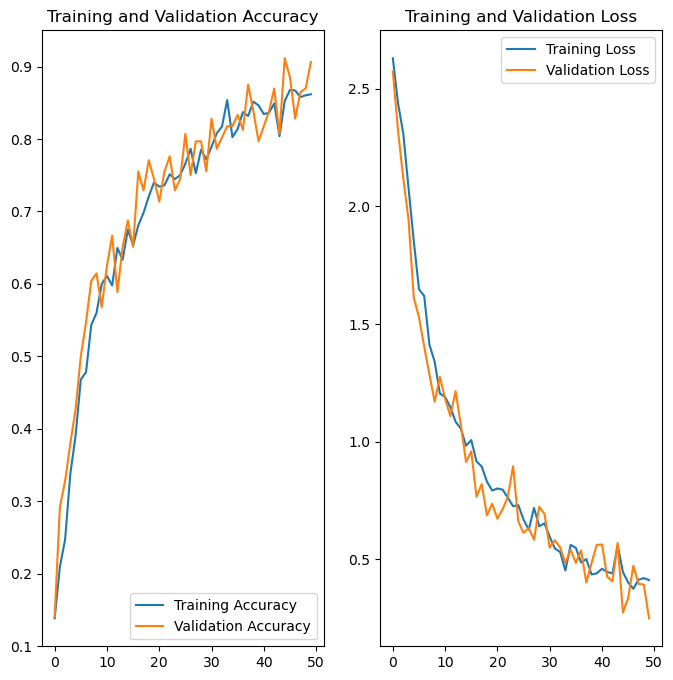

In [49]:
EPOCHS = 50

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Run prediction on a sample image

In [51]:
import numpy as np

First image to predict
Actual label: Tomato_healthy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step
Predicted label: Tomato_healthy


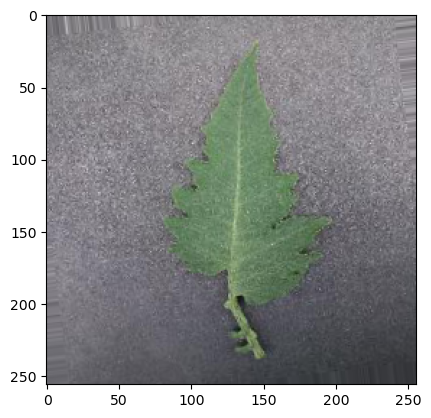

In [57]:
for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    print("First image to predict")
    plt.imshow(first_image)
    print("Actual label:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("Predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break

In [59]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


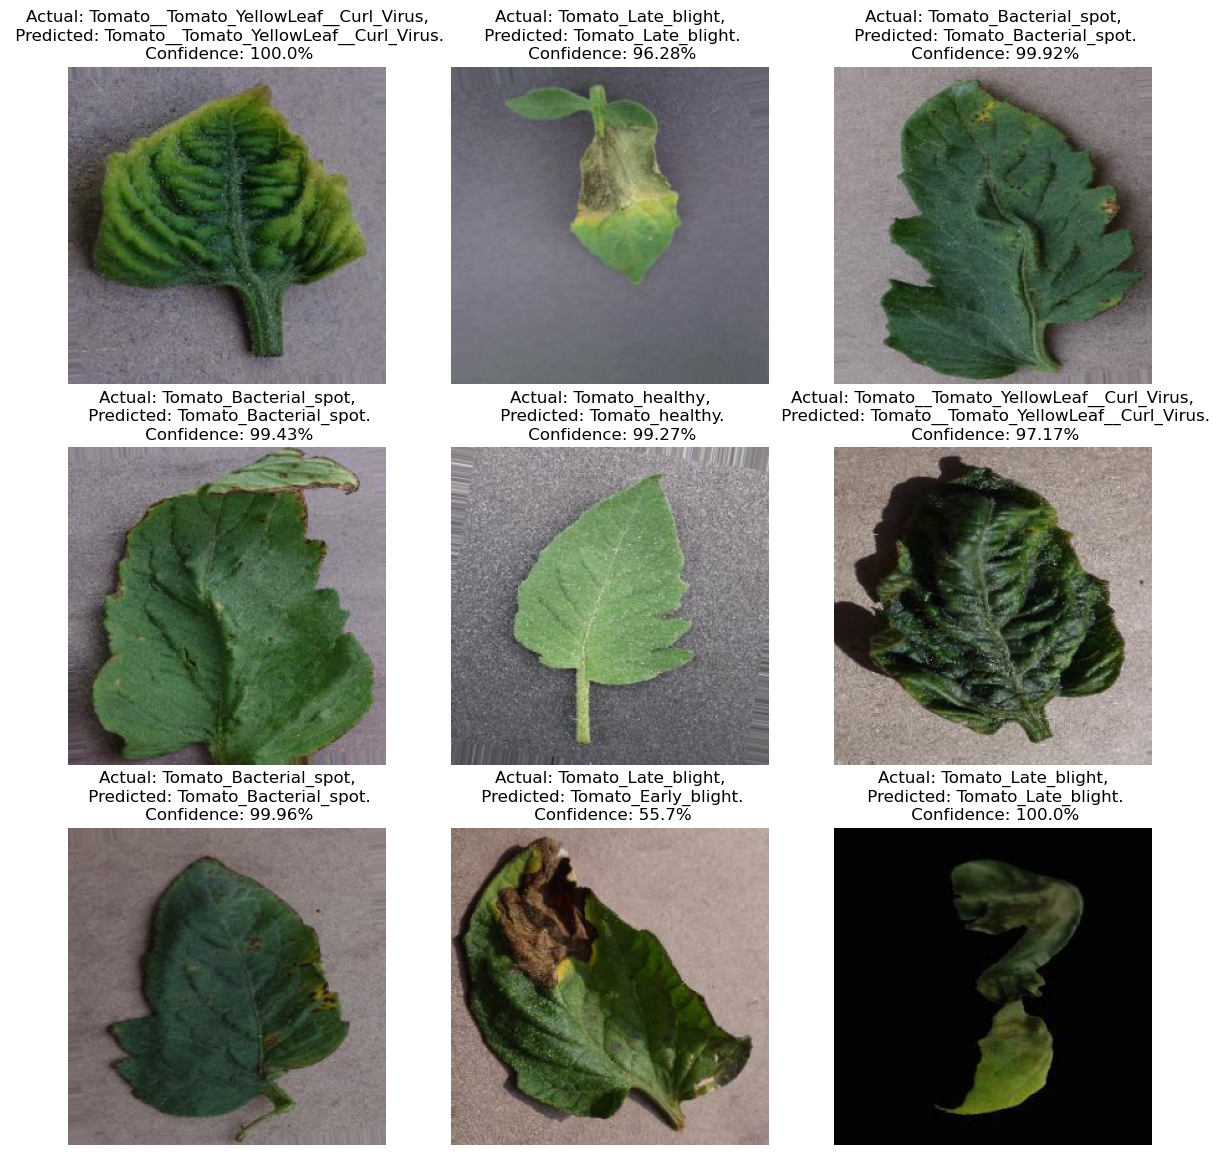

In [61]:
plt.figure(figsize=(14, 14))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

# Saving the Model

In [65]:
model_version=10

In [85]:
model.save(f"./models/version_{model_version}.h5")